In [1]:
import glob # Ordering the files
import numpy as np
import matplotlib.pylab as plt
from scipy.ndimage import zoom
from scipy.ndimage import gaussian_filter
import Target_cohesin_loading.util_visual as util
from Target_cohesin_loading.lattice_translocators import LEFTranslocator, LEFTranslocatorDynamicBoundary
from Target_cohesin_loading.funcs import *
import Target_cohesin_loading.funcs as funcs
import cooltools
import cooltools.lib.plotting
import chromoscores.maputils as chrmap
import chromoscores.snipping as chrsnip
import chromoscores.scorefunctions as chrscores
import pandas as pd
import h5py 
import os
import h5py 
import time
import sys
import warnings
import ast

import seaborn as sns

/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/lib/numutils.py:11: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from ._numutils import (
/home1/rahmanin/.conda/envs/openmm-env/lib/python3.7/site-packages/cooltools/api/expected.py:14: FutureWarning: The `cooler.tools` module is deprecated in v0.9 and will be removed in v0.10. Use `cooler.parallel` instead.
  from cooler.tools import partition


In [2]:
directory = '/scratch1/rahmanin/target_loading_cohesin/target/vloading_with_association/sims/'
path_dict = {}
for name  in glob.glob(directory+'/folder_*'):
    path_dict[name.split('/sims/')[1][:]]= name
path_dict = dict(sorted(path_dict.items()))

folder_face_1.0_back_0_Clife_17.0_Cof_17.0_life_66.0_slife_66.0_birth_0.0001_targetsnum_10_deltactcf_1600_pause_0.0_sep_74_site_10_monomer_1000_replica_1_steps_200_vel_1


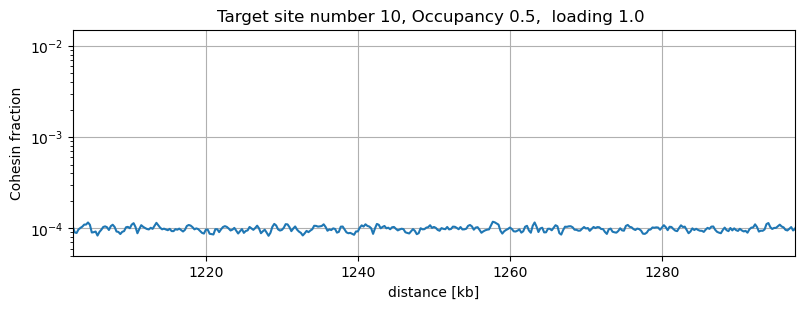

folder_face_1.0_back_0_Clife_17.0_Cof_17.0_life_66.0_slife_66.0_birth_0.0005_targetsnum_10_deltactcf_1600_pause_0.0_sep_74_site_10_monomer_1000_replica_1_steps_200_vel_1


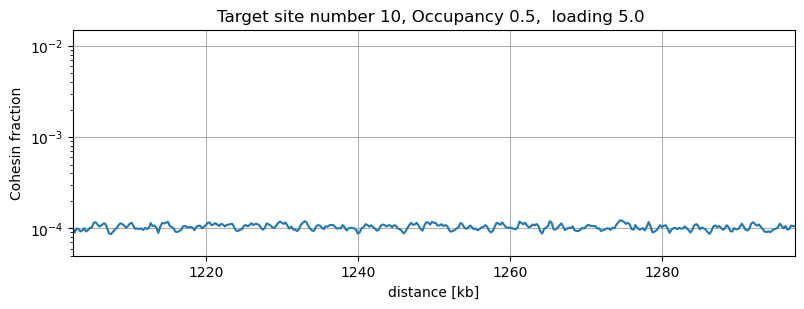

folder_face_1.0_back_0_Clife_17.0_Cof_17.0_life_66.0_slife_66.0_birth_0.001_targetsnum_10_deltactcf_1600_pause_0.0_sep_74_site_10_monomer_1000_replica_1_steps_200_vel_1


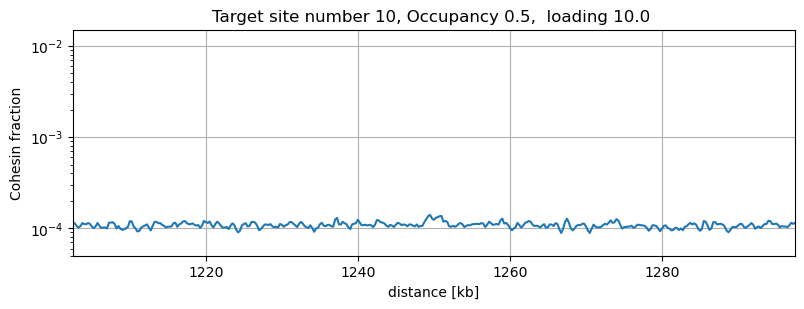

folder_face_1.0_back_0_Clife_17.0_Cof_17.0_life_66.0_slife_66.0_birth_0.005_targetsnum_10_deltactcf_1600_pause_0.0_sep_74_site_10_monomer_1000_replica_1_steps_200_vel_1


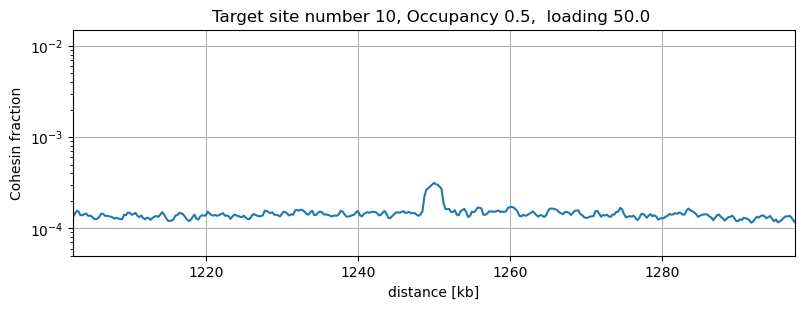

folder_face_1.0_back_0_Clife_17.0_Cof_17.0_life_66.0_slife_66.0_birth_0.01_targetsnum_10_deltactcf_1600_pause_0.0_sep_74_site_10_monomer_1000_replica_1_steps_200_vel_1


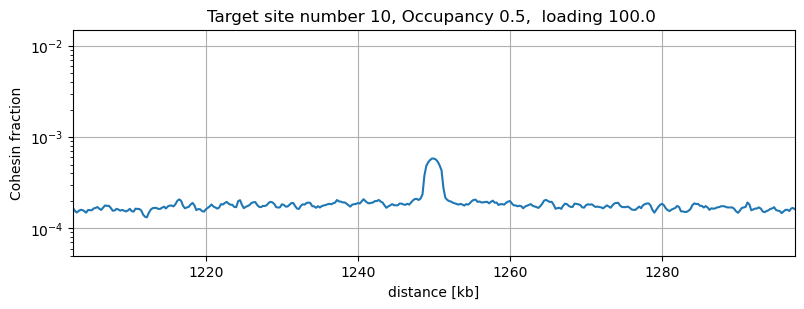

In [3]:
window_size = 1
numx,numy = 1,len(path_dict)
rep = 1 
mon = 1000
site = 10
ba_time = 2500000
hist_dict = {}
c=1
sns.reset_defaults()
#file = open('data/relative_ratio_target_targetnum_res_rev_further_15kb.csv','w')
#file.write('birth,target_s_num,deltactcf,clife,cof,sep,face,ratio\n')
dire = '/scratch1/rahmanin/target_loading_cohesin/target/vloading_with_association/sims/'
for name in list(path_dict.keys())[:]:
    try:
        params=[ast.literal_eval(i) for i in name.split('folder_')[1].split('_')[1::2]]
        face, back, clife, cof, life, slife, birth, target_s_num, deltactcf, pause, sep, site, mon, rep, step, vel = params
        if deltactcf== 1600 and target_s_num == 10:
            c+=1
            print(name)
            mapN=mon*site
            lefs = h5py.File(dire+name+'/LEFPositions.h5','r')["positions"]
            lef_lefts = lefs[ba_time:,:,0].flatten()
            lef_rights = lefs[ba_time:,:,1].flatten()
            ctcfrightlist = np.array(h5py.File(dire+name+'/LEFPositions.h5','r')['CTCF_sites_right'])
            ctcfleftlist = np.array(h5py.File(dire+name+'/LEFPositions.h5','r')['CTCF_sites_left'])
            lst = np.array(list(ctcfrightlist))# + list(ctcfleftlist))
            
            lef_lefts = lefs[ba_time:,:,0].flatten()
            lef_rights = lefs[ba_time:,:,1].flatten()
            lef_positions = np.hstack((lef_lefts,lef_rights))
        
            #plt.figure(figsize = (8.15,1.95))
            plt.figure(figsize = (8.15,3.195))
            a,b = np.histogram(  np.mod( np.hstack((lef_lefts,lef_rights)) , mapN ), np.arange(0,mapN,1))
        
            plt.scatter(5001, 0.0001, marker='P', color='orange', s=100)
            plt.plot(np.arange(len(a))*0.25,a/np.sum(a), label=name)
            ratio = (np.sum(a[4998:5002])/((np.sum(a[5080:5084])+np.sum(a[4916:4920]))/2))
            #file.write('%s,%s,%s,%s,%s,%s,%s,%s\n'%(birth,target_s_num, deltactcf,clife,cof,sep,face,ratio))
            plt.scatter(ctcfrightlist,np.zeros(len(ctcfrightlist))+0.000095,marker='<',color='red',s=150,zorder=3)
            plt.scatter(ctcfleftlist,np.zeros(len(ctcfleftlist))+0.000095,marker='>',color='red',s=150,zorder=3)
    
            plt.grid(True)
            
            plt.ylim(0.00005, 0.015)
            plt.xlim(4810*0.25, 5190*0.25)
            hist_dict[name] = a/np.sum(a)
        
            plt.ylabel('Cohesin fraction')
            plt.yscale('log')
            plt.xlabel('distance [kb]')
            plt.title(r'Target site number %s, Occupancy 0.5,  loading %s '%(target_s_num, np.round(birth/0.0001)))
            
            plt.tight_layout()
            plt.show()
    except Exception as e:
        print('file %s should be process'%name)
        
#file.close()

In [4]:
# Contact maps

In [5]:
mapdir = './maps'
map_path_directory = {}
for name in glob.glob(mapdir+'/folder_*'):
    map_path_directory[name.split('/maps/')[1][:]]= name
map_path_directory = dict(sorted(map_path_directory.items()))

In [12]:
import matplotlib as mpl

# Reset to defaults
mpl.rcdefaults()

/home1/rahmanin/repositories/chromoscores/chromoscores/maputils.py:193: RuntimeWarning: invalid value encountered in double_scalars
  mat[i, i + j] = contact_map[i, i + j] / (np.mean(np.diag(contact_map, k=j)))


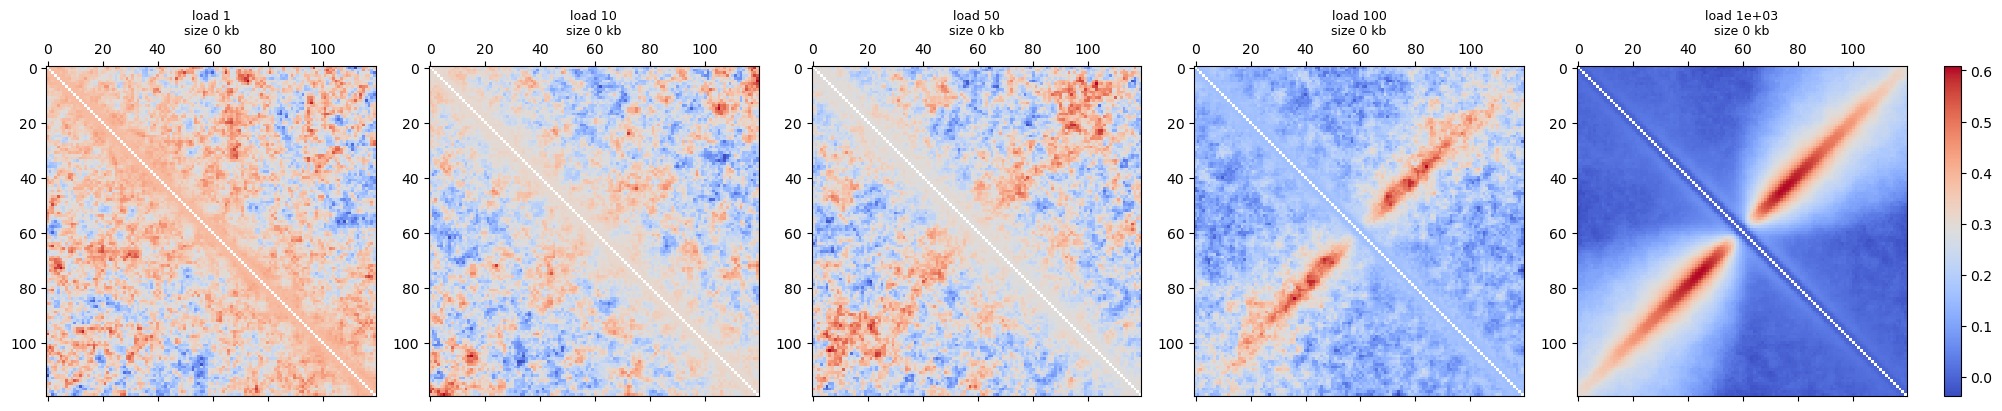

In [13]:
# define specific sizes and rates
target_list = [1]#, 3, 4, 10, 16,50 ]

birth_list = [0.0001, 0.001, 0.005, 0.01, 0.1]

for tnum in target_list:
    selected_names = []
    for name in map_path_directory.keys():
        params = [ast.literal_eval(i) for i in name.split('npz')[0]
                  .split('folder_')[1].split('_')[1::2]]
        _, _, _, _, life, _, birth, targetnum, deltactcf, _, sep, _, _, _, _, _ = params

        if (life == 66 and sep == 74 and deltactcf == 1600
            and targetnum == tnum and any(abs(birth - b) < 1e-8 for b in birth_list)):
            selected_names.append(name)

    if not selected_names:
        continue

    # same plotting setup as your original
    fig, axes = plt.subplots(
        1, len(selected_names),
        figsize=(4 * len(selected_names), 4),
        constrained_layout=True
    )
    if len(selected_names) == 1:
        axes = [axes]

    im = None
    for ax, name in zip(axes, selected_names):
        params = [ast.literal_eval(i) for i in name.split('npz')[0]
                  .split('folder_')[1].split('_')[1::2]]
        _, _, _, _, life, _, birth, targetnum, deltactcf, _, sep, _, _, _, _, _ = params

        data = np.load('%s' % map_path_directory[name])
        mrc = data['arr_0'].astype(float)
        mrc /= np.median(np.diag(mrc, 2))
        mat = chrmap.get_observed_over_expected(mrc)
        birtha=birth/0.0001
        im = ax.matshow(np.log10(mat[440:560, 440:560]), cmap='coolwarm', rasterized=True)
        ax.set_title(f'load {birtha:.3g}\nsize {targetnum/4:.0f} kb', fontsize=9)

    # shared colorbar
    fig.colorbar(im, ax=axes, fraction=0.025, pad=0.02)

    # save figure
    fig.savefig(
        f'figs/maps_observed_expected/fountain_target_{tnum}.png',
        dpi=500,
        bbox_inches='tight',
        pad_inches=0.15
    )
    plt.show()
    plt.close(fig)


/home1/rahmanin/repositories/chromoscores/chromoscores/maputils.py:193: RuntimeWarning: invalid value encountered in double_scalars
  mat[i, i + j] = contact_map[i, i + j] / (np.mean(np.diag(contact_map, k=j)))


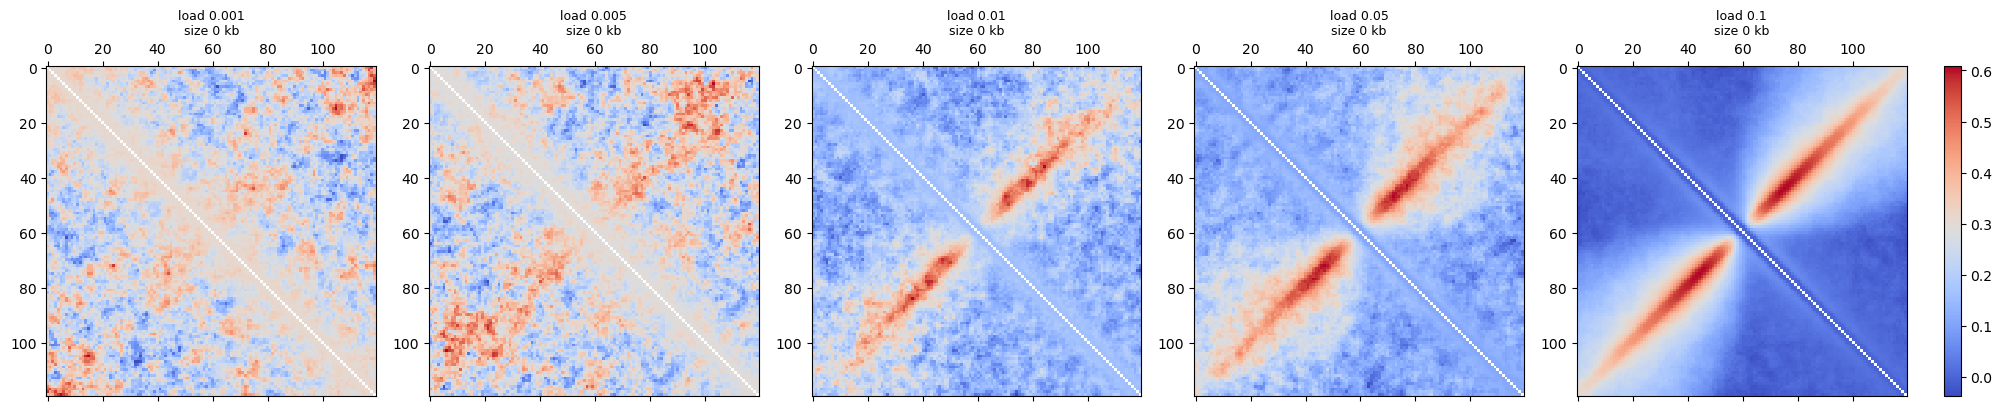

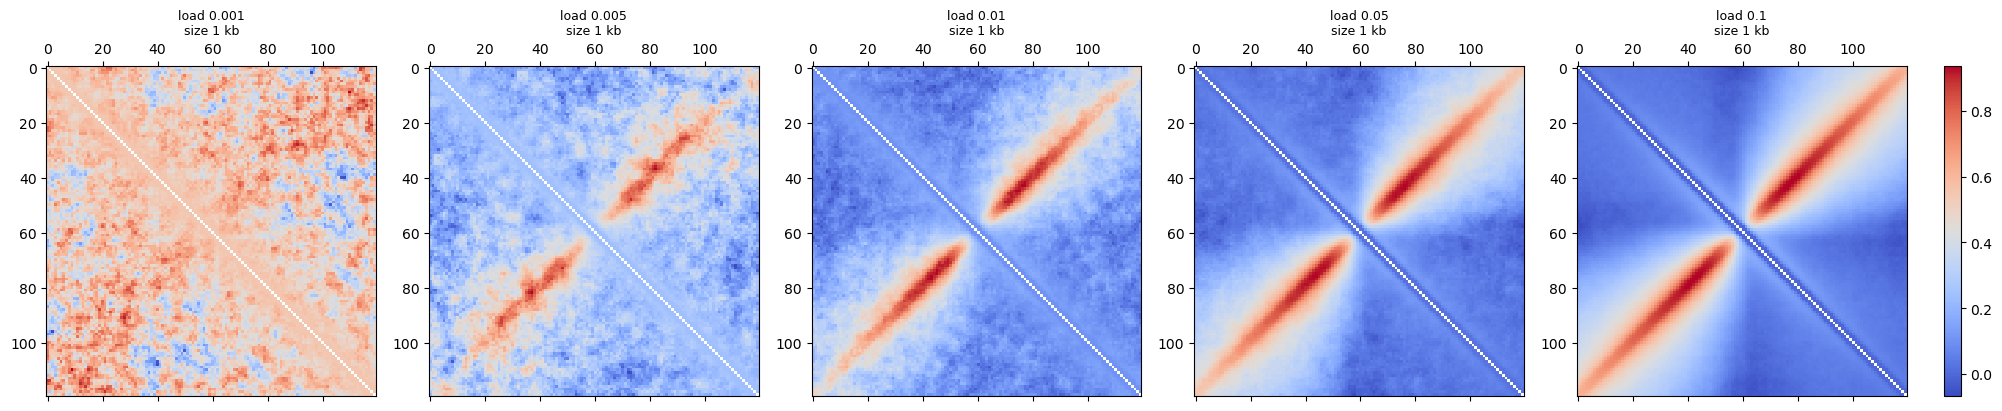

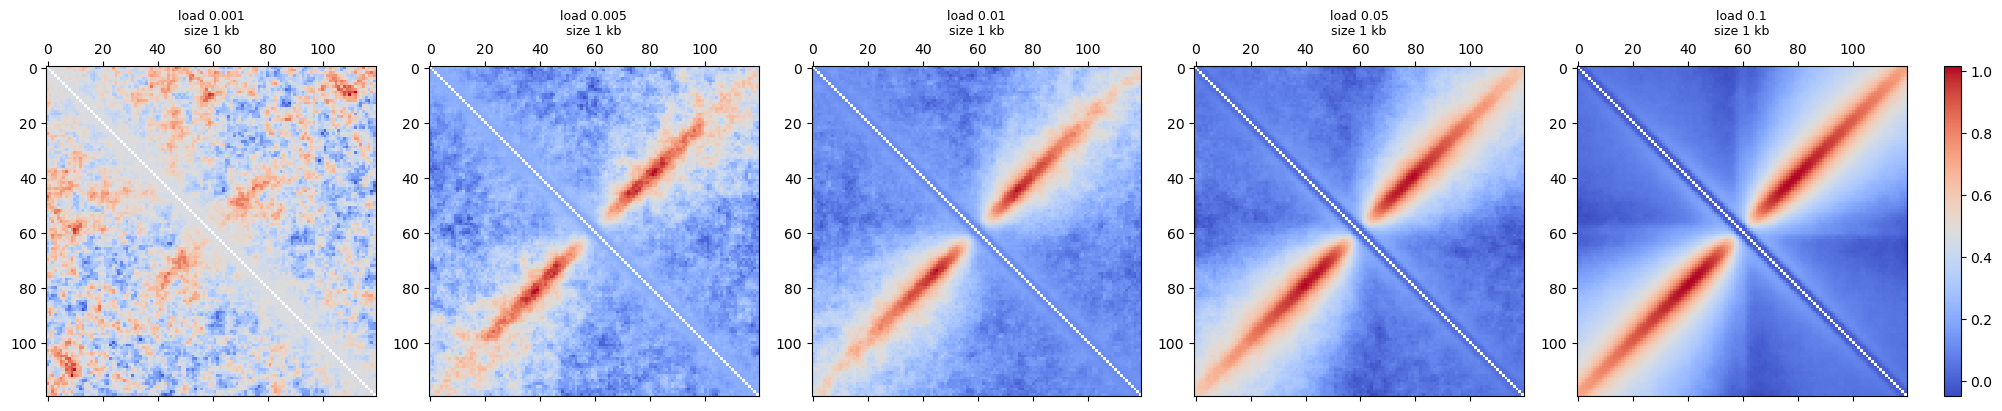

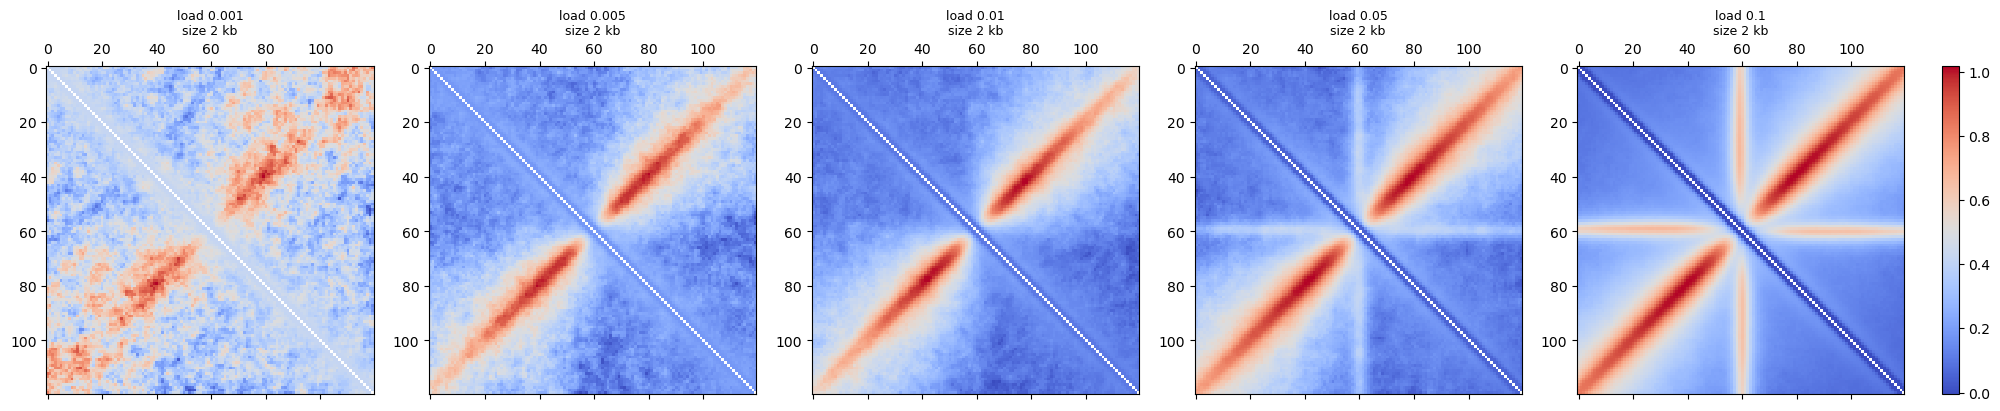

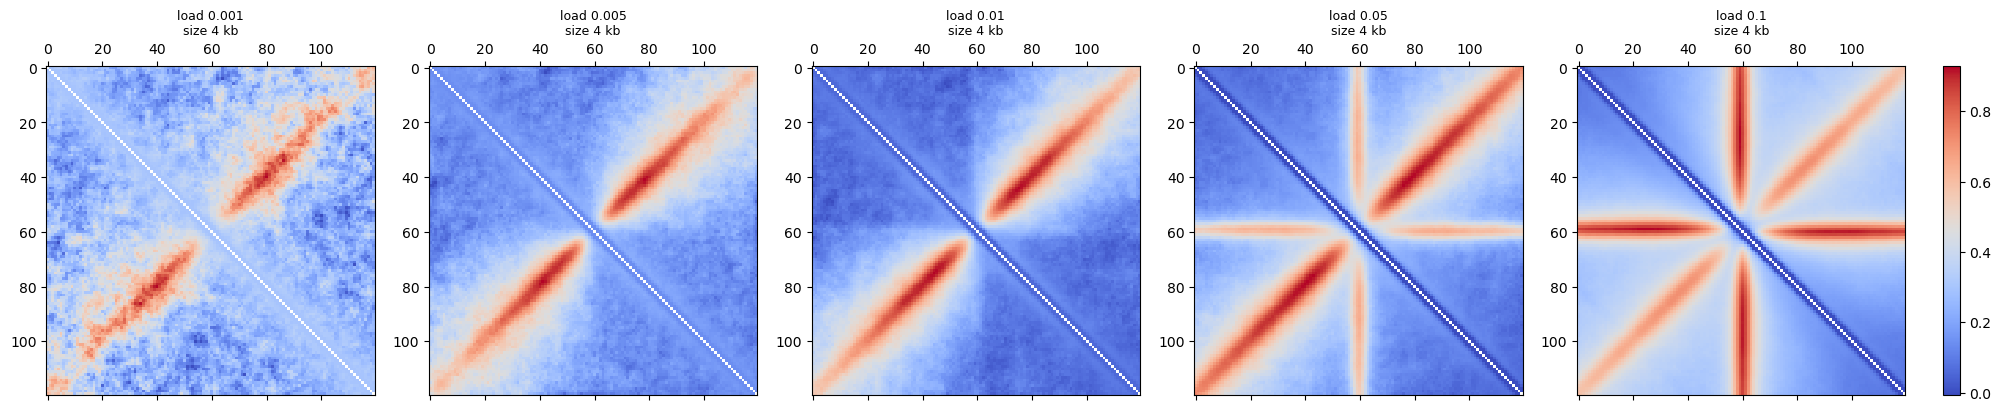

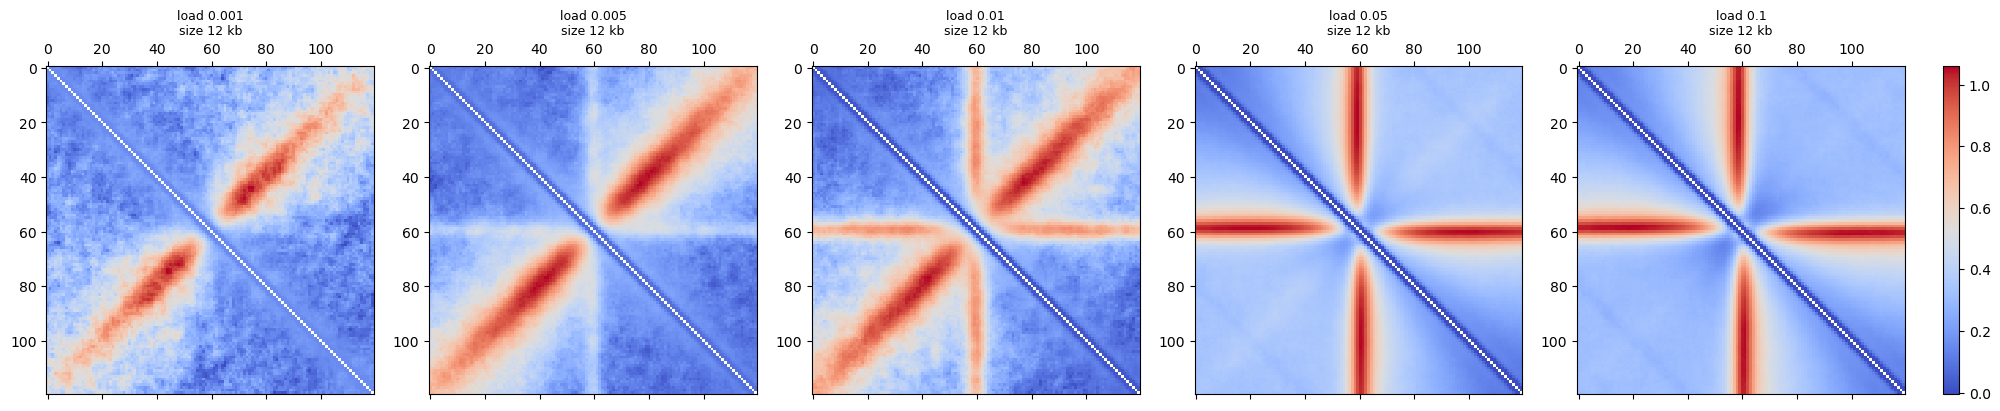

In [7]:
# define specific sizes and rates
target_list = [1, 3, 4, 10, 16,50 ]

birth_list = [0.001, 0.005, 0.01, 0.05, 0.1]

for tnum in target_list:
    selected_names = []
    for name in map_path_directory.keys():
        params = [ast.literal_eval(i) for i in name.split('npz')[0]
                  .split('folder_')[1].split('_')[1::2]]
        _, _, _, _, life, _, birth, targetnum, deltactcf, _, sep, _, _, _, _, _ = params

        if (life == 66 and sep == 74 and deltactcf == 1600
            and targetnum == tnum and any(abs(birth - b) < 1e-8 for b in birth_list)):
            selected_names.append(name)

    if not selected_names:
        continue

    # same plotting setup as your original
    fig, axes = plt.subplots(
        1, len(selected_names),
        figsize=(4 * len(selected_names), 4),
        constrained_layout=True
    )
    if len(selected_names) == 1:
        axes = [axes]

    im = None
    for ax, name in zip(axes, selected_names):
        params = [ast.literal_eval(i) for i in name.split('npz')[0]
                  .split('folder_')[1].split('_')[1::2]]
        _, _, _, _, life, _, birth, targetnum, deltactcf, _, sep, _, _, _, _, _ = params

        data = np.load('%s' % map_path_directory[name])
        mrc = data['arr_0'].astype(float)
        mrc /= np.median(np.diag(mrc, 2))
        mat = chrmap.get_observed_over_expected(mrc)

        im = ax.matshow(np.log10(mat[440:560, 440:560]), cmap='coolwarm', rasterized=True)
        ax.set_title(f'load {birth:.3g}\nsize {targetnum/4:.0f} kb', fontsize=9)

    # shared colorbar
    fig.colorbar(im, ax=axes, fraction=0.025, pad=0.02)

    # save figure
    fig.savefig(
        f'figs/maps_observed_expected/fountain_target_{tnum}.png',
        dpi=500,
        bbox_inches='tight',
        pad_inches=0.15
    )
    plt.show()
    plt.close(fig)


In [8]:
##### Enrichment at loading sites

17.0 17.0 74


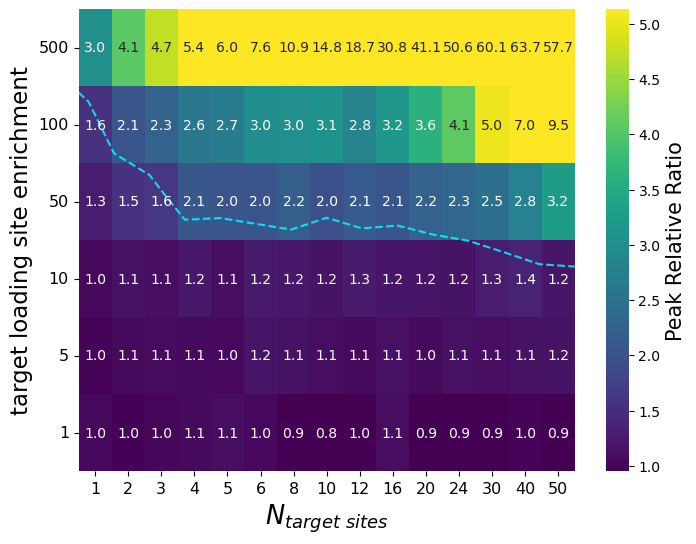

In [10]:
from scipy.ndimage import zoom
import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter
file = pd.read_csv('data/relative_ration_withmod_res_rev_further.csv') 

file['birthp']=(file['birth']/0.0001).astype(int)
file['deltactcf']=file['deltactcf']*0.125
file = file[file['birthp']<5000]
file = file[file['snum']<=50]
unique_birth=np.unique(birth)
deltactcf = file['deltactcf']
unique_deltactcf = np.unique(deltactcf)
clife = np.unique(file['clife'])[0]
for deltactcf in np.unique(file['deltactcf']):
    for cof_val in np.unique(file['cof']):
        for sep_vals in [ 74]:
            print(clife, cof_val,sep_vals)
            new_file = file[file['deltactcf']==deltactcf]
            new_file = new_file[new_file['sep']==sep_vals]    
            new_file = new_file[new_file['cof']==cof_val]
            new_file['ratio']=new_file['ratio'].round(3)
           
            new_file_filtered = new_file.drop_duplicates(keep = 'first')
            
            dtaframe_grouped = new_file_filtered.groupby(['birthp', 'snum'], as_index=False).mean()
            
            heatmap_data = dtaframe_grouped.pivot('birthp', 'snum', 'ratio')
            
            # Create the heatmap using seaborn
            plt.figure(figsize=(8, 6))
            im = sns.heatmap(heatmap_data, annot=True, cmap='viridis', fmt='1.1f',vmin=0.95,vmax=5.131, cbar_kws={'label': 'Frip score'} )
            sns.set(font_scale=0.81)
            cbar = im.collections[0].colorbar
            cbar.set_label('Peak Relative Ratio', fontsize=15)
            ##### making equepotentiala
            val = 1.8
            val = 1.8
            cline_num=15
            coline_num=6
            smooth_scale = 1
            d = gaussian_filter(heatmap_data.to_numpy(), sigma=0.45)
            
            z = ndimage.zoom(heatmap_data.to_numpy(), smooth_scale)

            cntr1 = im.contour(np.linspace(0, cline_num, cline_num * smooth_scale),
                           np.linspace(0, coline_num, coline_num * smooth_scale),
                           d, levels=[1.81], colors='cyan', linestyles='dashed', alpha=0.83)
        
            # Add legend manually for the contours
            hansen_line, = plt.plot([], [], color='cyan', linestyle='dashed', alpha=0.83, label='%s'%val)
            plt.xlabel(r'$N_{target\ sites}$', fontsize = 18.5)
            plt.xticks(fontsize =11.5)
            #plt.title(r'proc=%s kb, $\delta_{ctcf, target}$=%s kb, $\tau_b$/$\tau_E$=%s, Occup = %s, density= 1/%s kb'%(life*5, 250, np.round(clife/life,1),np.round(clife/(clife+cof_val),1), sep_vals*2.5), fontsize = 11)
            plt.ylabel(r'target loading site enrichment', fontsize =16.5)
            plt.yticks(fontsize=11.5, rotation=0)
            plt.gca().invert_yaxis()
            plt.savefig('heatmap.pdf')
            plt.show()